In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Step 1: Load the CSV
df = pd.read_csv("batsman_vs_bowler_dataset.csv")

# Step 2: Basic exploration
print(df.head())
print(df.info())

# Step 3: Convert date to year and month
df['Match_Date'] = pd.to_datetime(df['Match_Date'])
df['Year'] = df['Match_Date'].dt.year
df['Month'] = df['Match_Date'].dt.month

# Step 4: Encode categorical features
label_cols = ['Weather', 'Pitch_Type', 'Batting_Hand', 'Bowling_Type']
label_encoders = {}

for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # store for later use (if needed for decoding)

# Step 5: Drop unused columns
df = df.drop(columns=['Batsman', 'Bowler', 'Ground_Name', 'Format', 'Match_Date'])

# View final prepared data
print(df)


C:\Users\tiwar\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\tiwar\anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\tiwar\anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:\n%s" %


   Match_ID      Batsman          Bowler     Pitch_Type Ground_Name Weather  \
0         1  Virat Kohli  Mitchell Starc  Hard & Bouncy         MCG   Clear   
1         2  Virat Kohli  Mitchell Starc  Hard & Bouncy         MCG  Cloudy   
2         3  Virat Kohli  Mitchell Starc  Hard & Bouncy         MCG   Clear   
3         4  Virat Kohli  Mitchell Starc  Hard & Bouncy         MCG  Cloudy   

  Format  Prev_Dismissals  Balls_Faced  Runs_Scored  Strike_Rate Batting_Hand  \
0    T20                3           20           35        175.0   Right-hand   
1    T20                1           15           12         80.0   Right-hand   
2    T20                0           30           60        200.0   Right-hand   
3    T20                2           10            5         50.0   Right-hand   

    Bowling_Type  Match_Date  
0  Left-arm Fast  2023-10-22  
1  Left-arm Fast  2022-11-10  
2  Left-arm Fast  2021-12-05  
3  Left-arm Fast  2020-01-15  
<class 'pandas.core.frame.DataFrame'>
Range

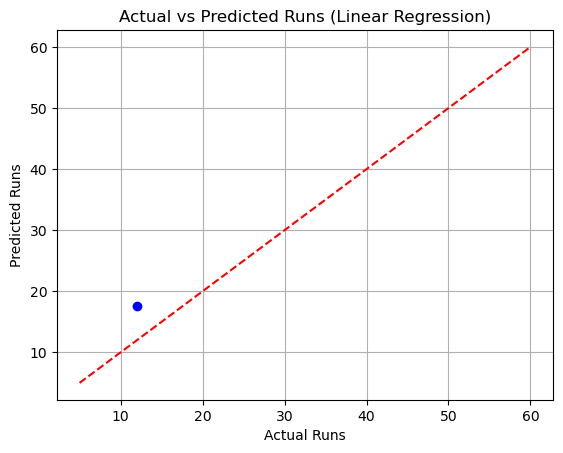

R² (R-squared): nan
R (Correlation coefficient): nan


C:\Users\tiwar\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\tiwar\anaconda3\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\tiwar\anaconda3\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\tiwar\anaconda3\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


In [15]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np

# === Step 1: Load CSV ===
df = pd.read_csv("batsman_vs_bowler_dataset.csv")

# === Step 2: Preprocess ===
df['Match_Date'] = pd.to_datetime(df['Match_Date'])
df['Year'] = df['Match_Date'].dt.year
df['Month'] = df['Match_Date'].dt.month

label_cols = ['Weather', 'Pitch_Type', 'Batting_Hand', 'Bowling_Type']
for col in label_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

df = df.drop(columns=['Batsman', 'Bowler', 'Ground_Name', 'Format', 'Match_Date'])

# === Step 3: Model Setup ===
X = df.drop(columns=['Runs_Scored'])
y = df['Runs_Scored']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


# === Step 4: Plot ===
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Runs')
plt.ylabel('Predicted Runs')
plt.title('Actual vs Predicted Runs (Linear Regression)')
plt.grid(True)
plt.show()

# === Step 5: Metrics ===
r_squared = r2_score(y_test, y_pred)
correlation_matrix = np.corrcoef(y_test, y_pred)
r_value = correlation_matrix[0, 1]

print(f"R² (R-squared): {r_squared:.3f}")
print(f"R (Correlation coefficient): {r_value:.3f}")


In [1]:
import numpy as np
import pandas as pd

np.random.seed(42)  # For reproducibility
n_samples = 100

data = {
    'pitch_type': np.random.randint(0, 3, n_samples),
    'bowler_type': np.random.randint(0, 3, n_samples),
    'weather': np.random.randint(0, 3, n_samples),
    'toss_won': np.random.randint(0, 2, n_samples),
    'form': np.random.uniform(20, 80, n_samples),
    'stadium_size': np.random.randint(0, 3, n_samples),
    'batting_position': np.random.randint(1, 8, n_samples),
    'previous_runs_vs_bowler': np.random.uniform(10, 70, n_samples),
    'day_or_night': np.random.randint(0, 2, n_samples),
}

# Simulate runs as a weighted sum + some noise
runs = (
    0.3 * data['form'] +
    0.2 * data['previous_runs_vs_bowler'] -
    2 * data['batting_position'] +
    5 * data['toss_won'] +
    np.random.normal(0, 5, n_samples)  # noise
)

data['runs'] = runs.round(1)

# Convert to DataFrame for easy processing
df = pd.DataFrame(data)

df.head()


C:\Users\tiwar\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\tiwar\anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\tiwar\anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:\n%s" %


,pitch_type,bowler_type,weather,toss_won,form,stadium_size,batting_position,previous_runs_vs_bowler,day_or_night,runs
0,2,2,0,0,41.518807,0,3,47.763918,1,18.9
1,0,2,1,1,35.249819,0,7,51.744921,0,13.5
2,2,2,0,0,37.717435,0,5,37.272464,1,24.2
3,2,0,1,0,39.353046,2,3,47.653485,1,20.9
4,0,2,1,1,70.920188,2,3,45.058859,0,28.6


Depth 1: R² Score = 0.649
Depth 2: R² Score = 0.901
Depth 3: R² Score = 0.975
Depth 4: R² Score = 1.000
Depth 5: R² Score = 1.000
Depth 6: R² Score = 1.000
Depth 7: R² Score = 1.000
Depth 8: R² Score = 1.000
Depth 9: R² Score = 1.000

Best Depth: 4 with R² Score: 1.000


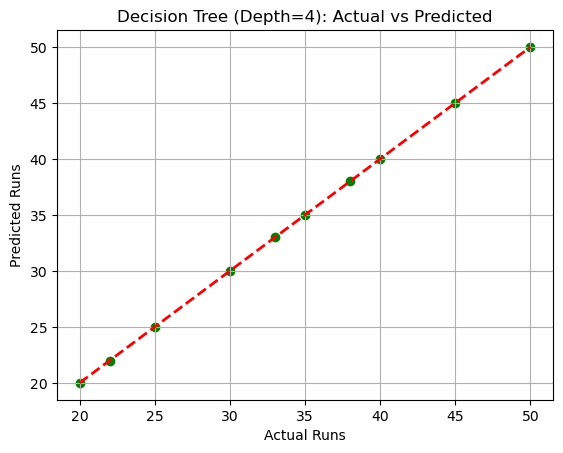

Final R² (R-squared): 1.000
Final R (Correlation coefficient): 1.000


In [6]:
#decision tree
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

# Sample expanded dataset (manually created)
# Let's say the features are: [pitch_condition, bowler_quality, batsman_form]
# Target is: runs_scored

import numpy as np

X = np.array([
    [2, 3, 7],
    [3, 2, 6],
    [1, 5, 4],
    [2, 1, 8],
    [3, 4, 3],
    [2, 3, 5],
    [1, 2, 6],
    [3, 5, 2],
    [2, 4, 7],
    [1, 3, 5]
])

y = np.array([40, 35, 20, 50, 25, 38, 30, 22, 45, 33])  # runs scored


# Use the same X and y from earlier
model = DecisionTreeRegressor(max_depth=3, random_state=42)
model.fit(X, y)

# Predict and plot
y_pred = model.predict(X)

depth_scores = []

for depth in range(1, 10):
    model = DecisionTreeRegressor(max_depth=depth, random_state=42)
    model.fit(X, y)
    y_pred = model.predict(X)
    score = r2_score(y, y_pred)
    depth_scores.append((depth, score))

# Print results
for depth, score in depth_scores:
    print(f"Depth {depth}: R² Score = {score:.3f}")


# Find best depth based on R²
best_depth, best_score = max(depth_scores, key=lambda x: x[1])
print(f"\nBest Depth: {best_depth} with R² Score: {best_score:.3f}")

# Retrain model at best depth for final plot and metrics
best_model = DecisionTreeRegressor(max_depth=best_depth, random_state=42)
best_model.fit(X, y)
y_pred = best_model.predict(X)

# Scatter Plot: Actual vs Predicted
plt.scatter(y, y_pred, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual Runs')
plt.ylabel('Predicted Runs')
plt.title(f'Decision Tree (Depth={best_depth}): Actual vs Predicted')
plt.grid(True)
plt.show()

# Metrics
r_squared = r2_score(y, y_pred)
corr_coef, _ = pearsonr(y, y_pred)

print(f"Final R² (R-squared): {r_squared:.3f}")
print(f"Final R (Correlation coefficient): {corr_coef:.3f}")
